In [15]:
import joblib
import numpy as np
from scipy.ndimage import label as nlabel
from functools import partial
from sklearn.ensemble import RandomForestClassifier
from skimage import io,segmentation,data, feature, future
from glob import glob
import matplotlib.pyplot as plt
import napari
import os

In [2]:
#path to image folder use \*.tif to select all images in one folder 
path=r"C:\Users\Sander\Desktop\20230112-0830-1.tif (blue).tif"
imgs=glob(path)
imgs

['C:\\Users\\Sander\\Desktop\\20230112-0830-1.tif (blue).tif']

In [9]:
#load classifier. path to classifier made in napari-buds
clf=joblib.load(r'D:\Dropbox\Sander BackUp Alienware\Python_Segmentation_Spot_Detection_Pipeline\cookiecutter\napari-buds-fromG\classifier_Daniëlle_2.pkl')

In [10]:
clf

RandomForestClassifier(max_depth=20, max_samples=0.05, n_jobs=-1)

C:\Users\Sander\AppData\Local\Temp\ipykernel_124564\445502939.py:21: UserWarning: F:\save_folder\20230112-0830-1.tif (blue).tif is a low contrast image
  io.imsave(os.path.join('F:\save_folder',filename),result)


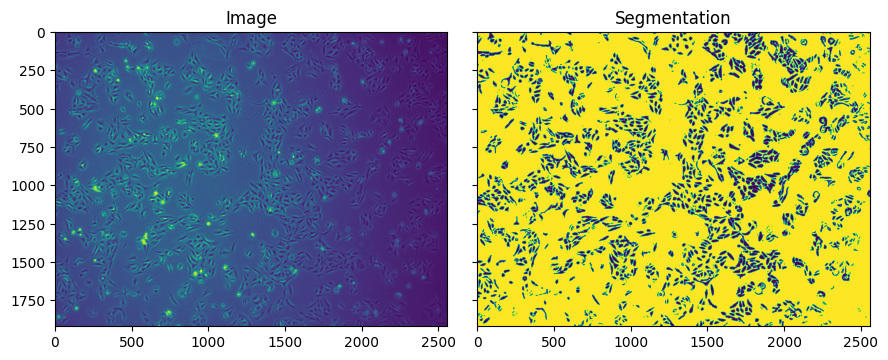

In [16]:
for img in imgs:
    
    #get filename of img
    filename=os.path.basename(img)
    
    #load into memory
    img=io.imread(imgs[0]).astype(np.uint16)

    #feature extraction
    features_func=partial(feature.multiscale_basic_features,intensity=True, edges=True, texture=True,sigma_min=1, sigma_max=20)
    fs=[]
    fs.append(features_func(img))
    features = np.concatenate(fs, axis=-1)
    
    #classification
    result = future.predict_segmenter(features, clf)

    # can be commented out
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
    ax[0].imshow(img)
    ax[0].set_title('Image')
    ax[1].imshow(result)
    ax[1].set_title('Segmentation')
    fig.tight_layout()
    # till here

    #save imgs
    io.imsave(os.path.join('F:\save_folder',filename),result)